# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_by_city = []
record_number = 1
for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    #Collect the weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json['cod'] == '404':
        print(f"{city} city not found. Skipping ...")
    else:
        #Append data collected to list 
        print(f"Processing Record {record_number} | {city}")
        weather_by_city.append({
            'City' : city,
            'Cloudiness' : weather_json['clouds']['all'],
            'Country' : weather_json['sys']['country'],
            'Date' : round(time.time()),
            'Humidity' : weather_json['main']['humidity'],
            'Lat' : weather_json['coord']['lat'],
            'Lng' : weather_json['coord']['lon'],
            'Max Temp' : weather_json['main']['temp_max'],
            'Wind Speed' : weather_json['wind']['speed']
        })
    record_number = record_number + 1      
    
print("-----------------------------")
print("Data Retrieval Complete ")     
print("-----------------------------")

Processing Record 1 | tecoanapa
Processing Record 2 | tautira
Processing Record 3 | vaini
Processing Record 4 | ushuaia
Processing Record 5 | port alfred
Processing Record 6 | bredasdorp
Processing Record 7 | cherskiy
Processing Record 8 | butaritari
Processing Record 9 | ostrovnoy
Processing Record 10 | clyde river
Processing Record 11 | severo-kurilsk
Processing Record 12 | karratha
Processing Record 13 | hasaki
lolua city not found. Skipping ...
Processing Record 15 | bambous virieux
Processing Record 16 | mahebourg
Processing Record 17 | tilichiki
belushya guba city not found. Skipping ...
Processing Record 19 | bluff
Processing Record 20 | hermanus
Processing Record 21 | salalah
Processing Record 22 | morehead
Processing Record 23 | ilulissat
Processing Record 24 | corinto
Processing Record 25 | saint-philippe
Processing Record 26 | rikitea
Processing Record 27 | georgetown
Processing Record 28 | jamkhed
Processing Record 29 | cape town
Processing Record 30 | nalut
Processing Reco

Processing Record 246 | kutum
Processing Record 247 | beringovskiy
amderma city not found. Skipping ...
Processing Record 249 | samarai
Processing Record 250 | kodinar
Processing Record 251 | ponta do sol
Processing Record 252 | kahului
Processing Record 253 | kavaratti
Processing Record 254 | arraial do cabo
Processing Record 255 | mokhsogollokh
Processing Record 256 | gizo
Processing Record 257 | vetlanda
Processing Record 258 | wukari
kamenskoye city not found. Skipping ...
Processing Record 260 | hambantota
Processing Record 261 | komatsu
Processing Record 262 | saint-augustin
Processing Record 263 | coihaique
Processing Record 264 | kirakira
Processing Record 265 | puerto escondido
Processing Record 266 | chuy
Processing Record 267 | danane
Processing Record 268 | mackay
Processing Record 269 | roma
Processing Record 270 | ziro
Processing Record 271 | brae
Processing Record 272 | wajima
Processing Record 273 | dunedin
Processing Record 274 | basco
Processing Record 275 | rodrigues

Processing Record 487 | loukhi
Processing Record 488 | tarpon springs
Processing Record 489 | areni
Processing Record 490 | ancud
Processing Record 491 | havre-saint-pierre
Processing Record 492 | veraval
Processing Record 493 | beberibe
Processing Record 494 | hyeres
kristiinankaupunki city not found. Skipping ...
Processing Record 496 | rio grande
Processing Record 497 | tigil
Processing Record 498 | yarensk
Processing Record 499 | edd
Processing Record 500 | kiruna
Processing Record 501 | tongliao
palabuhanratu city not found. Skipping ...
Processing Record 503 | trairi
satitoa city not found. Skipping ...
Processing Record 505 | atasu
Processing Record 506 | scottsbluff
Processing Record 507 | kawalu
Processing Record 508 | pyatnitskoye
Processing Record 509 | waipawa
Processing Record 510 | antalaha
Processing Record 511 | mamaku
Processing Record 512 | mogadishu
Processing Record 513 | marathon
Processing Record 514 | faanui
Processing Record 515 | chor
Processing Record 516 | po

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_by_city_df = pd.DataFrame(weather_by_city)
weather_by_city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tecoanapa,5,MX,1554360861,74,16.99,-99.26,78.8,6.93
1,tautira,40,PF,1554360861,78,-17.73,-149.15,82.4,3.36
2,vaini,0,IN,1554360861,31,15.34,74.49,91.4,2.24
3,ushuaia,90,AR,1554360862,80,-54.81,-68.31,39.2,8.05
4,port alfred,0,ZA,1554360862,58,-33.59,26.89,72.0,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
timestamp = weather_by_city_df['Date'][0]
time_tuple = time.gmtime(timestamp)
report_date = f"{time_tuple[2]}/{time_tuple[1]}/{time_tuple[0]}"
report_date

'4/4/2019'

#### Latitude vs. Temperature Plot

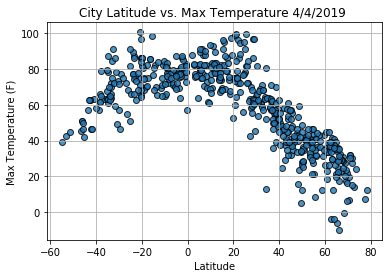

In [6]:
plt.scatter(weather_by_city_df.Lat.values, weather_by_city_df['Max Temp'].values, alpha=0.8,  edgecolor = 'black')

plt.grid()
plt.title(f"City Latitude vs. Max Temperature {report_date} ")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save Figure
plt.savefig('images/temperature.png')

#### Latitude vs. Humidity Plot

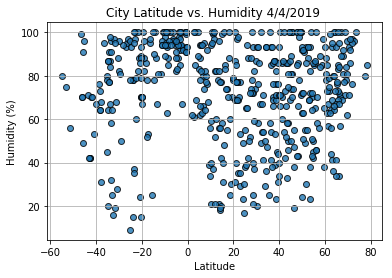

In [7]:
plt.scatter(weather_by_city_df.Lat.values, weather_by_city_df['Humidity'].values, alpha=0.8,  edgecolor = 'black')

plt.grid()
plt.title(f"City Latitude vs. Humidity {report_date} ")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig('images/humidity.png')

#### Latitude vs. Wind Speed Plot

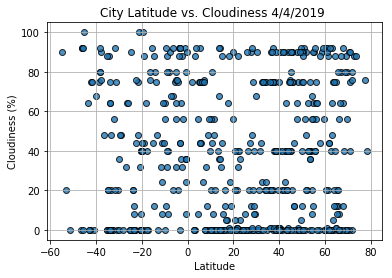

In [8]:
plt.scatter(weather_by_city_df.Lat.values, weather_by_city_df['Cloudiness'].values, alpha=0.8,  edgecolor = 'black')

plt.grid()
plt.title(f"City Latitude vs. Cloudiness {report_date} ")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save Figure
plt.savefig('images/cloudiness.png')

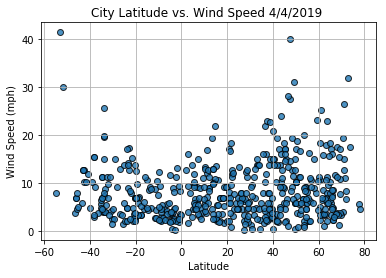

In [10]:
plt.scatter(weather_by_city_df.Lat.values, weather_by_city_df['Wind Speed'].values, alpha=0.8,  edgecolor = 'black')

plt.grid()
plt.title(f"City Latitude vs. Wind Speed {report_date} ")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save Figure
plt.savefig('images/windSpeed.png')